In [45]:
import numpy as np
import matplotlib.pyplot as plt

size = (300, 300)

%matplotlib inline

In [49]:
np.arange(9)

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

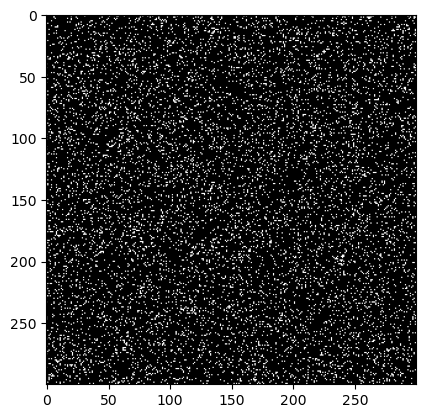

In [58]:
test_grid = np.random.randint(0, 10, size=size)
test_grid[test_grid < 9] = 0
test_grid[test_grid == 9] = 1
plt.imshow(test_grid, cmap='gray')

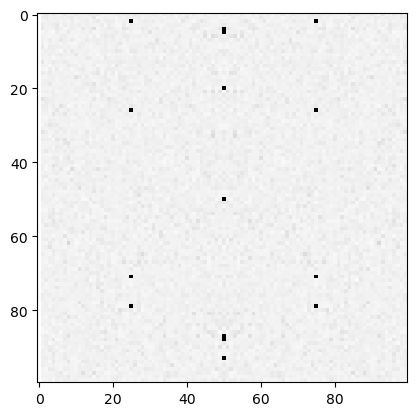

In [31]:
test_ttf = np.fft.fft(test_grid)
plt.imshow(np.log(np.abs(test_ttf)), cmap='gray')

In [11]:
kernel_size = (5, 5)
kernel = np.ones(kernel_size)
kernel

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

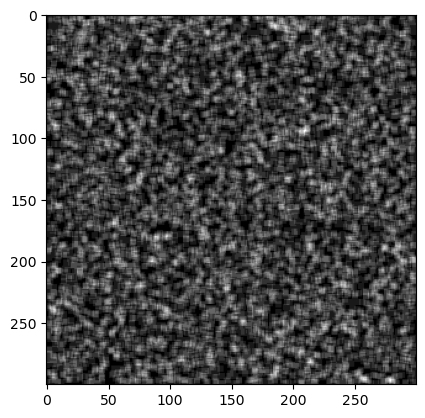

In [47]:
from scipy.signal import correlate2d
result = correlate2d(test_grid, kernel, mode='same')
plt.imshow(result, cmap='gray')

In [34]:
np.mean(result)

6.1062

In [23]:
np.sqrt(500)

22.360679774997898

In [59]:
num_agents = test_grid[test_grid == 1].shape[0]
np.sqrt(num_agents), num_agents

(94.79451460923254, 8986)

In [60]:
kernel_size = np.sqrt(num_agents/300).astype(np.int32)
kernel_size

5

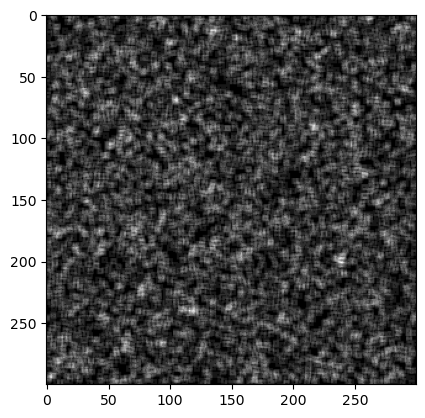

In [66]:
kernel = np.ones((kernel_size, kernel_size))
kernel[kernel_size // 2, kernel_size // 2] = 0
result = correlate2d(test_grid, kernel, mode='same')
plt.imshow(result, cmap='gray')

In [75]:
filtered_results = result[test_grid == 1]
test_grid == 1

array([[False, False,  True, ..., False, False, False],
       [False, False, False, ..., False,  True, False],
       [False, False, False, ..., False,  True,  True],
       ...,
       [False, False, False, ..., False, False, False],
       [False,  True, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [71]:
np.mean(filtered_results), np.std(filtered_results), np.max(filtered_results), np.min(filtered_results)

(2.39906521255286, 1.50963048925456, 10.0, 0.0)

1

array([[1., 1., 1., ..., 4., 3., 3.],
       [1., 1., 2., ..., 5., 3., 4.],
       [1., 1., 2., ..., 5., 3., 3.],
       ...,
       [3., 3., 4., ..., 2., 2., 0.],
       [2., 1., 2., ..., 1., 1., 0.],
       [1., 1., 1., ..., 1., 1., 0.]])

In [80]:
results = []

for i in range(1000):
    test_grid = np.random.randint(0, 10, size=size)
    test_grid[test_grid < 9] = 0
    test_grid[test_grid == 9] = 1
    num_agents = test_grid[test_grid == 1].shape[0]
    kernel_size = np.sqrt(num_agents/300).astype(np.int32)
    kernel = np.ones((kernel_size, kernel_size))
    kernel[kernel_size // 2, kernel_size // 2] = 0
    result = correlate2d(test_grid, kernel, mode='same')
    filtered_results = result[test_grid == 1]
    results.append([np.mean(filtered_results), np.std(filtered_results), np.max(filtered_results), np.min(filtered_results)])
results

[[2.3906336699589392, 1.4940034572365155, 10.0, 0.0],
 [2.358269037235827, 1.4482039374275568, 8.0, 0.0],
 [2.3775824175824174, 1.4394224579455857, 9.0, 0.0],
 [2.4495918817560116, 1.5030472573389804, 11.0, 0.0],
 [2.391270632546804, 1.4795242980931105, 9.0, 0.0],
 [2.375885727139804, 1.481554943307614, 9.0, 0.0],
 [2.4150776053215077, 1.4869703661502134, 10.0, 0.0],
 [2.3497747747747746, 1.4861068140571565, 10.0, 0.0],
 [2.4186707477044163, 1.4988149755834577, 10.0, 0.0],
 [2.3361496000901205, 1.4688738394945178, 9.0, 0.0],
 [2.4221687800612157, 1.4609620676220727, 8.0, 0.0],
 [2.377366798767063, 1.4558823505074132, 9.0, 0.0],
 [2.431970178708475, 1.4976514705326975, 9.0, 0.0],
 [2.359769605671245, 1.496320561856554, 11.0, 0.0],
 [2.3709066607262197, 1.4534769774927032, 10.0, 0.0],
 [2.439206227387348, 1.4797000029710377, 9.0, 0.0],
 [2.375041932237504, 1.481939027321043, 9.0, 0.0],
 [2.339074032654887, 1.4612694412364768, 10.0, 0.0],
 [2.3523512369066193, 1.4415228475478181, 9.0, 0.0

In [99]:
num_birds = np.random.randint(0, 1000) / 10
np.floor(num_birds) // 2 * 2 + 1, num_birds

(33.0, 32.5)

In [104]:
test_set = {1, 2, 3, 4, 5}
test_set, type(test_set)

({1, 2, 3, 4, 5}, set)

In [107]:
np.fromiter(test_set, dtype=np.int32)

SyntaxError: invalid syntax (1078904030.py, line 1)

In [111]:
def make_locs(n, m):
    """Makes array where each row is an index in an `n` by `m` grid.

    n: int number of rows
    m: int number of cols

    returns: NumPy array
    """
    t = [(i, j) for i in range(n) for j in range(m)]
    return np.array(t)

locs = make_locs(300, 300)
np.random.shuffle(locs)
occupancy = set(tuple(locs[i]) for i in range(0, 100))
occupancy

{(0, 133),
 (2, 189),
 (9, 224),
 (10, 48),
 (12, 135),
 (14, 7),
 (14, 43),
 (16, 183),
 (17, 23),
 (19, 231),
 (21, 98),
 (23, 251),
 (25, 31),
 (25, 228),
 (26, 82),
 (26, 221),
 (27, 293),
 (30, 125),
 (31, 260),
 (40, 143),
 (41, 241),
 (43, 100),
 (50, 286),
 (51, 41),
 (55, 70),
 (56, 104),
 (60, 80),
 (60, 206),
 (61, 204),
 (67, 49),
 (69, 46),
 (69, 254),
 (70, 298),
 (71, 280),
 (77, 298),
 (78, 284),
 (79, 77),
 (82, 256),
 (84, 1),
 (84, 70),
 (84, 89),
 (88, 160),
 (88, 235),
 (92, 184),
 (95, 129),
 (105, 60),
 (105, 223),
 (106, 270),
 (111, 61),
 (117, 143),
 (118, 258),
 (126, 266),
 (136, 229),
 (146, 78),
 (147, 91),
 (153, 117),
 (154, 55),
 (157, 90),
 (162, 51),
 (165, 204),
 (167, 84),
 (170, 252),
 (172, 111),
 (174, 183),
 (191, 130),
 (192, 267),
 (204, 10),
 (204, 164),
 (213, 145),
 (214, 112),
 (218, 19),
 (225, 73),
 (226, 184),
 (229, 7),
 (232, 28),
 (232, 243),
 (240, 253),
 (247, 175),
 (252, 145),
 (252, 154),
 (254, 50),
 (258, 159),
 (258, 215),
 (

In [125]:
test = list(occupancy)
test_arr = np.array(test)
test_arr

array([[ 77, 298],
       [ 23, 251],
       [ 41, 241],
       [  0, 133],
       [167,  84],
       [218,  19],
       [162,  51],
       [191, 130],
       [264, 208],
       [ 17,  23],
       [268,   4],
       [252, 145],
       [ 84,  70],
       [287,  57],
       [225,  73],
       [252, 154],
       [240, 253],
       [ 55,  70],
       [ 25, 228],
       [226, 184],
       [ 71, 280],
       [297, 235],
       [  2, 189],
       [ 60, 206],
       [165, 204],
       [ 26,  82],
       [105, 223],
       [147,  91],
       [258, 215],
       [ 30, 125],
       [ 21,  98],
       [ 60,  80],
       [172, 111],
       [ 84,   1],
       [ 67,  49],
       [ 69,  46],
       [ 95, 129],
       [204, 164],
       [ 25,  31],
       [105,  60],
       [267, 204],
       [287, 182],
       [ 40, 143],
       [154,  55],
       [274, 145],
       [157,  90],
       [ 14,   7],
       [ 69, 254],
       [ 61, 204],
       [ 78, 284],
       [ 50, 286],
       [111,  61],
       [ 70,

In [118]:
test

[(77, 298),
 (23, 251),
 (41, 241),
 (0, 133),
 (167, 84),
 (218, 19),
 (162, 51),
 (191, 130),
 (264, 208),
 (17, 23),
 (268, 4),
 (252, 145),
 (84, 70),
 (287, 57),
 (225, 73),
 (252, 154),
 (240, 253),
 (55, 70),
 (25, 228),
 (226, 184),
 (71, 280),
 (297, 235),
 (2, 189),
 (60, 206),
 (165, 204),
 (26, 82),
 (105, 223),
 (147, 91),
 (258, 215),
 (30, 125),
 (21, 98),
 (60, 80),
 (172, 111),
 (84, 1),
 (67, 49),
 (69, 46),
 (95, 129),
 (204, 164),
 (25, 31),
 (105, 60),
 (267, 204),
 (287, 182),
 (40, 143),
 (154, 55),
 (274, 145),
 (157, 90),
 (14, 7),
 (69, 254),
 (61, 204),
 (78, 284),
 (50, 286),
 (111, 61),
 (70, 298),
 (88, 160),
 (27, 293),
 (9, 224),
 (43, 100),
 (229, 7),
 (26, 221),
 (118, 258),
 (16, 183),
 (79, 77),
 (279, 230),
 (266, 22),
 (82, 256),
 (214, 112),
 (117, 143),
 (204, 10),
 (153, 117),
 (254, 50),
 (170, 252),
 (146, 78),
 (192, 267),
 (12, 135),
 (106, 270),
 (292, 189),
 (232, 28),
 (247, 175),
 (126, 266),
 (56, 104),
 (14, 43),
 (19, 231),
 (266, 154

In [146]:
test_barn = np.ones((300, 300))
test_barn[test_arr[:, 0], test_arr[:, 1]] = 0

In [128]:
test_arr

array([[ 77, 298],
       [ 23, 251],
       [ 41, 241],
       [  0, 133],
       [167,  84],
       [218,  19],
       [162,  51],
       [191, 130],
       [264, 208],
       [ 17,  23],
       [268,   4],
       [252, 145],
       [ 84,  70],
       [287,  57],
       [225,  73],
       [252, 154],
       [240, 253],
       [ 55,  70],
       [ 25, 228],
       [226, 184],
       [ 71, 280],
       [297, 235],
       [  2, 189],
       [ 60, 206],
       [165, 204],
       [ 26,  82],
       [105, 223],
       [147,  91],
       [258, 215],
       [ 30, 125],
       [ 21,  98],
       [ 60,  80],
       [172, 111],
       [ 84,   1],
       [ 67,  49],
       [ 69,  46],
       [ 95, 129],
       [204, 164],
       [ 25,  31],
       [105,  60],
       [267, 204],
       [287, 182],
       [ 40, 143],
       [154,  55],
       [274, 145],
       [157,  90],
       [ 14,   7],
       [ 69, 254],
       [ 61, 204],
       [ 78, 284],
       [ 50, 286],
       [111,  61],
       [ 70,

In [142]:
x = map(np.array, locs[:100])
test_arr = np.array(list(x))
test_arr[:, 0]

array([266,  79,  69,  31, 296, 213, 268, 170,  43, 136,  95, 165,  69,
        30,  40, 214,  60, 105, 266, 264,  88, 279, 162, 226, 297,  84,
       146,  23,  84, 270, 267,   9,  16,  88, 229, 172,  25, 204, 105,
       191,  26,  92, 232, 292, 174, 254, 154,  21,   2,  26, 225,  14,
       147,  78,  51,  60,  77,  70,  27, 258, 252,  84, 295, 111, 267,
       274, 106,  41,   0,  10,  55, 167, 247,  50, 252, 287,  14, 258,
       278, 118,  61, 240, 126, 157, 117,  17,  25,  67, 153,  12, 204,
       192, 232,  19,  56, 218, 299,  82, 287,  71])

In [143]:
test_barn[test_arr[:, 0], test_arr[:, 1]]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])